# Ejercicios - Práctica 4: Compilación de programas

### Optimización del código gracias al compilador


- Pega el siguiente código en Compiler Explorer (https://godbolt.org/).

```C
#define ARRAY_SIZE 16

int array[ARRAY_SIZE];

int main() {
    int i = 0;
    while(i < ARRAY_SIZE) {
        array[i] = -1;
        ++i;
    }
}

```

PREGUNTA: Explica brevemente lo que hace el programa.

RESPUESTA:

Se trata de un programa en C, que recorre un array de 16 enteros, y establece el valor de todos los elementos a -1. @solution@

- Añade la opción `-O0` (la letra «o» mayúscula, seguida del número cero) a los parámetros pasados al compilador. Esta opción establece el nivel de optimización del compilador a 0 (desactivado). Una vez que el programa se compile, aparecerá en el centro el código ensamblador generado. Haz una captura de pantalla del código ensamblador generado y pégalo en la siguiente celda

CAPTURA DE PANTALLA (-O0): 
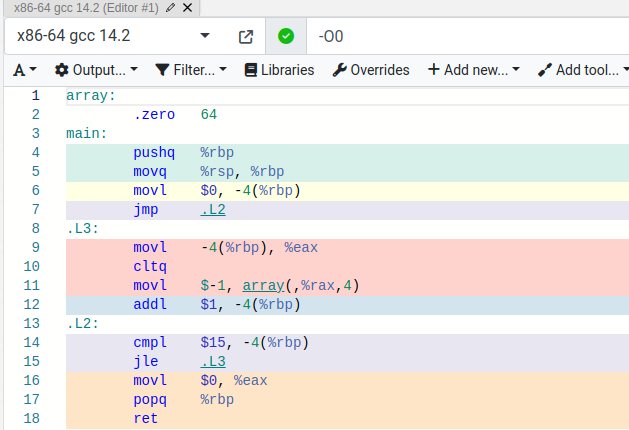@solution@

PREGUNTA: ¿Cuántas instrucciones contiene el programa compilado con `-O0`? 

RESPUESTA:

13 instrucciones. @solution@

- Ahora, establece el nivel 1 de optimización del compilador, sustituyendo `-O0` por `-O1`. Luego, vuelve a hacer una captura de las instrucciones generadas.

CAPTURA DE PANTALLA (-O1): 

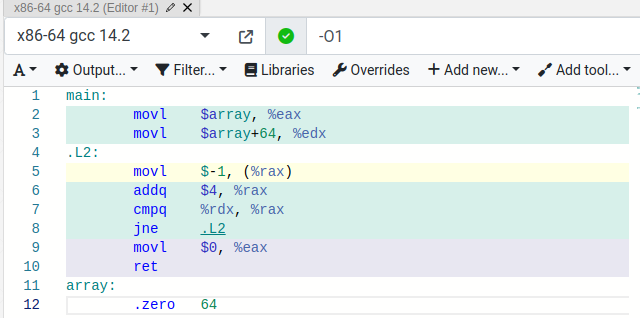@solution@

PREGUNTA: ¿Cuántas instrucciones contiene el programa compilado con `-O1`? 

RESPUESTA:

8 instrucciones. @solution@

PREGUNTA: A la vista del código fuente en C, y sabiendo que en el ISA x86, la instrucción `jne .L2` realiza un salto a la instrucción marcada con la etiqueta `.L2:`, ¿cuántas veces se ejecutará la instrucción `movl    $-1, (%rax)`?

RESPUESTA:

Se ejecutará 16 veces, ya que está dentro de un bucle que recorre el array, con tantas iteraciones como elementos tiene el array.@solution@

PREGUNTA: A la vista del número de instrucciones que conforman la traducción del bucle *while*, y teniendo en cuenta el número de iteraciones del mismo que se llevan a cabo, ¿cuántas instrucciones, aproximadamente, se ejecutarán para completar el programa? 

RESPUESTA:

Como el bucle tiene 4 instrucciones y se ejecuta 16 veces, y hay dos instrucciones antes del bucle y dos después, en total la ejecución del programa necesitará ejecutar 4*16+2+2=68 instrucciones. @solution@

- Por último, establece el nivel 2 de optimización del compilador, sustituyendo `-O1` por `-O2`. Luego, vuelve a hacer una captura de las instrucciones generadas.

CAPTURA DE PANTALLA (-O2): 
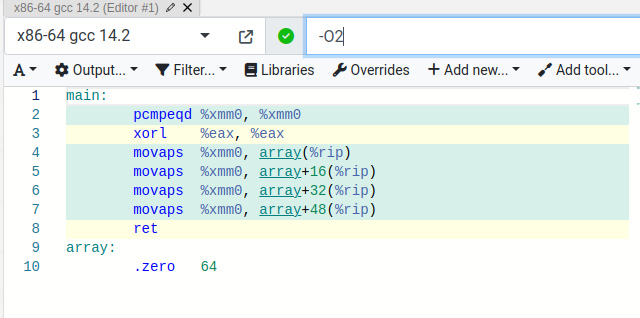@solution@

PREGUNTA: ¿Cuántas instrucciones contiene el programa compilado con `-O2`? 

RESPUESTA:

7 instrucciones. @solution@

PREGUNTA: A la vista de que no hay ninguna instrucción de salto (`jne`) en el programa generado, ¿cuántas instrucciones, exactamente, se ejecutarán para completar el programa esta vez?


RESPUESTA:

En el código ensamblador resultante no hay ningún salto (ningún bucle), por tanto se ejecutarán las 7 instrucciones mostradas, una tras otra.@solution@

**MIDIENDO EL RENDIMIENTO**

Ejecuta la siguiente celda para generar el fichero `array_write.c` con el código fuente del programa anterior. Fíjate que la única diferencia con el programa que hemos compilado mediante la aplicación web de *Compiler explorer* es que ahora el array es de tamaño mucho mayor (2^22, algo más de 4 millones de elementos). Trabajar con un array más grande conlleva más instrucciones ejecutadas y nos permite medir el tiempo total que tarda el programa en ejecutarse de manera más precisa y menos sensible a perturbaciones por factores externos al programa.

In [ ]:
# Ejecuta esta celda para generar el fichero array_write.c
cat <<EOF > array_write.c
#define ARRAY_SIZE (1 << 22)

int array[ARRAY_SIZE];

int main() {
    int i = 0;
    while(i < ARRAY_SIZE) {
        array[i] = -1;
        ++i;
    }
}
EOF

Ahora, compila el programa en C anterior directamente a un ejecutable, usando el nivel de optimización 0. El programa ejecutable se debe llamar `array_write_O0`. 

In [ ]:
gcc -O0 array_write.c -o array_write_O0

Repite lo anterior, pero usando el nivel de optimización 2 y llamando  `array_write_O2` al ejecutable generado. 

In [ ]:
gcc -O2 array_write.c -o array_write_O2

Por último, ejecuta las siguientes celdas, para medir el tiempo empleado en ejecutar cada programa:

In [ ]:
time ./array_write_O0

In [ ]:
time ./array_write_O2

PREGUNTA: A la vista del rendimiento (tiempo de ejecución) de cada programa y de lo visto en los ejercicios anteriores, ¿qué conclusiones sacas?

RESPUESTA: 

Vemos que la versión optimizada con O2 reduce el tiempo de ejecución aproximadamente a la mitad de lo que tarda el programa compilado sin optimizaciones. Por tanto, vemos que las optimizaciones del compilador son capaces de mejorar ostensiblemente el rendimiento de un programa ejecutable, ya que son capaces de minimizar el número de instrucciones que es necesario ejecutar para llevar a cabo la tarea dictada por el programa en lenguaje C.@solution@

### Ensamblado y desensamblado

Vamos a compilar el programa array_write.c para generar código ensamblador: `array_write.s`. La opción que ves produce una salida más *limpia* y fácilmente legible.

In [ ]:
gcc -S -O1 array_write.c -fno-asynchronous-unwind-tables

In [ ]:
ls -l array_write.s

Con el comando `nl`, podemos numerar las líneas de un fichero de texto.

In [ ]:
nl array_write.c

PREGUNTA: ¿Cuántas líneas tiene el fichero de código ensamblador generado? ¿Entre qué dos números de línea está el bucle del programa?

In [ ]:
nl array_write.s               #@solution@

RESPUESTA:

Tiene 41 líneas. El bucle va de la línea 10 (tras la etiqueta .L2) a la línea 13 (instrucción `jne`). @solution@

Ensambla el fichero `array_write.s` para generar un fichero objeto `array_write.o`.

In [ ]:
gcc -c array_write.s             #@solution@

In [ ]:
ls -l array_write.o

Desensambla el fichero `array_write.o`:

In [ ]:
objdump -d array_write.o            #@solution@

PREGUNTA: ¿Cuál es el tamaño en bytes del código máquina generado? ¿Cuál es el código máquina de la instrucción `ret`, expresado en binario?

RESPUESTA:

27 bytes. `ret` se codifica en un byte: c3 (hex) = 1100 0101. @solution@

### Compilar un programa compuesto por múltiples módulos

In [ ]:
# Ejecuta esta celda para generar el fichero arrays_iguales.c
cat <<EOF > arrays_iguales.c
#include <stdbool.h>

int arrays_iguales(int size, int array1[], int array2[]) {
    int i = 0;
    while(i < size) {
        if (array1[i] != array2[i]) {
            return false;
        };
        ++i;
    }
    return true;
}
EOF

In [ ]:
# Ejecuta esta celda para generar el fichero miprograma.c
cat <<EOF > miprograma.c
#include <stdbool.h>
#define ARRAY_SIZE 8

int a[ARRAY_SIZE] = {0,1,2,3,4,5,6,7};
int b[ARRAY_SIZE] = {0,1,2,3,4,5,6,8};

//Declaramos la función de "array_iguales.c" para poder llamarla desde main
int arrays_iguales(int size, int array1[], int array2[]); 

int main() {
    return arrays_iguales(ARRAY_SIZE, a, b);
}
EOF

PREGUNTA: ¿Qué hace este programa?

RESPUESTA:

@Comparar dos arrays de 8 enteros cada uno, haciendo uso de una función llamada "arrays_iguales", que está definida en otro fichero de código fuente.@

PREGUNTA: ¿Qué variables utiliza `miprograma.c`?

RESPUESTA:

Dos arrays de enteros llamados `a` y `b`, ambos de tamaño 8 elementos (32 bytes).@solution@

Compila el fichero `miprograma.c` para generar un fichero objeto llamado `miprograma.o`.

In [ ]:
gcc -c miprograma.c           #@solution@

Compila el fichero `arrays_iguales.c` para generar un fichero objeto llamado `arrays_iguales.o`.

In [ ]:
gcc -c arrays_iguales.c           #@solution@

Con el comando `nm` podemos ver los símbolos (nombres de variables, funciones, etc.) que contiene un determinado fichero de código objeto. Ejemplo: `nm fichero.o`. Muestra los símbolos del fichero `miprograma.o`. Después, busca en la ayuda de `nm` la opción para mostrar únicamente los símbolos no definidos en este módulo (pero que aparecen referenciados en el módulo). A la vista de la información recabada, responde a la siguiente pregunta:

In [ ]:
nm miprograma.o               #@solution@

In [ ]:
nm -u miprograma.o               #@solution@

PREGUNTA: ¿Cuántos símbolos contiene el fichero objeto `miprograma.o`? ¿Cuáles están definidos en el propio módulo de código objeto y cuáles no están definidos?

RESPUESTA: 

Tiene 4 símbolos, de los cuales hay tres definidos (variables `a` y `b`, y función `main`) y uno que no está definido (función `array_iguales`). @solution@

PREGUNTA: Trata de compilar el fichero `miprograma.c` para generar directamente un ejecutable llamado `compara_arrays`. ¿Qué ocurre? Razona la respuesta (comenta el comando si se produce cualquier tipo de error).

In [ ]:
# gcc miprograma.c -o compara_arrays           #@solution@

RESPUESTA:

No es posible generar un programa ejecutable porque se produce un error durante la etapa de enlazado. El programa `ld` (enlazador) nos informa de que `miprograma` contiene una referencia a la función "arrays_iguales" que está sin definir (el enlazador no encuentra el código de "arrays_iguales"). @solution@

 Ahora usa `nm` para mostrar los símbolos del fichero objeto `arrays_iguales.o`

In [ ]:
# Muestra todos los símbolos
nm arrays_iguales.o               #@solution@

In [ ]:
# Símbolos no definidos´
nm -u arrays_iguales.o               #@solution@

Finalmente, escribe el comando necesario para conseguir generar un programa ejecutable llamado `compara_arrays`:

In [ ]:
gcc miprograma.o arrays_iguales.o -o compara_arrays   #@solution@

Ejecuta el programa para comprobar que devuelve un 0 (*false*), ya que los arrays `a` y `b` tienen valores distintos.

In [ ]:
./compara_arrays; echo $?    # echo $? muestra el valor retornado por el último comando

In [ ]:
# Cleanup
FILES="
arrays_iguales.c
arrays_iguales.o
array_write.c
array_write.o
array_write_O0
array_write_O2
array_write.s
compara_arrays
miprograma.c
miprograma.o"
rm -f $FILES

# Ejercicios - Práctica 4: Ensamblador RISC-V. Ejecución con RIPES

### Escribir datos en memoria: `result = var1 - var2`

- El programa que se muestra a continuación debe restar dos variables en memoria `var1` y `var2`, y luego escribir el resultado en una tercera variable llamada `result`. Sin embargo, el programa está incompleto.

```
    .data
var1: .word 0xa0b0c0
var2: .word 0x0c
result: .word 0xffffffff

    .text

    la x4, var1			
    lw x5, 0(x4)    # (1)
    lw x6, 4(x4)    # (2)
    sub x7,x5,x6    # (3)
                    # (4) 
```

- Copia y pega el código anterior Ripes, y ejecuta hasta llegar a la instrucción marcada con (2).

PREGUNTA: A la vista de los valores de los registros, en este punto del programa ¿en qué dirección de memoria está ubicada la variable `var1`? ¿Cuál es el tamaño de dicha variable? Indica qué direcciones de memoria ocupa (inicial y final, inclusive)

RESPUESTA: 

Está ubicada a partir de la dirección 0x10000000 y podemos saberlo porque la instrucción "la" (load address) ha puesto ese valor en el registro destino x4. var1 ocupa 4 bytes (una palabra, ".word"). Abarca desde la dirección 0x10000000 a la 0x10000003 @solution@

PREGUNTA: ¿Qué instrucción habría que añadir en la línea marcada con (4) para que el programa escriba el resultado de la resta en la variable `result`?.

RESPUESTA: 

sw x7, 8(x4) @solution@

PREGUNTA: Haz una captura de pantalla que muestre el valor de los registros x4,x5 y x6 antes de ejecutar la instrucción (2). ¿De dónde procede el valor que tiene el registro x5? 

RESPUESTA:

Procede de la memoria, de las direcciones ocupadas por la variable "var1", cuyo valor al comenzar el programa es 0xa0b0c0.
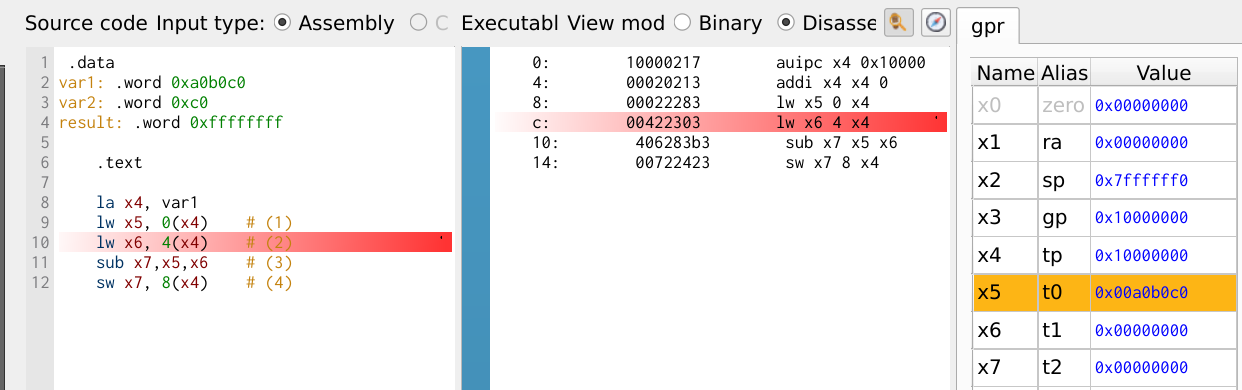 @solution@

PREGUNTA: ¿Cuál es la codificación en lenguaje máquina de la instrucción `lw x5, 0(x4)`? ¿Entre qué dos dirección de memoria se ubica dicha instrucción? Pega una captura de pantalla de la pestaña "Memory" que muestre el segmento de texto (parte de la memoria donde se ubican las instrucciones del programa).

RESPUESTA:

Se codifica como 0x00022283 y se ubica en las dirección 8 a la b. @solution@
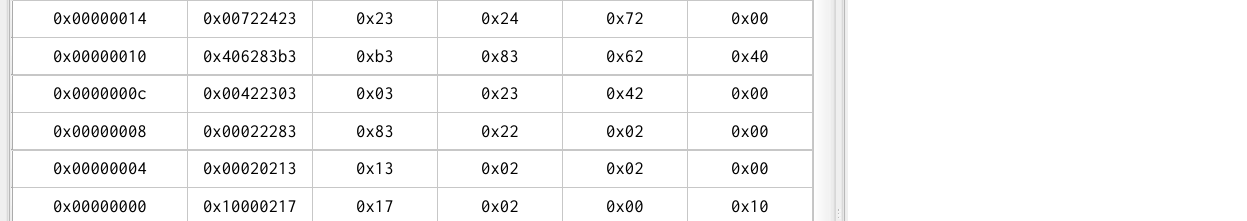 @solution@

PREGUNTA: ¿Cuál es el valor del byte en la dirección de memoria 0x10000002? Pega una captura de pantalla de la pestaña "Memory" que muestre el segmento de datos (parte de la memoria donde se ubican las variables globales del programa).

RESPUESTA:

Tiene el valor A0. @solution@
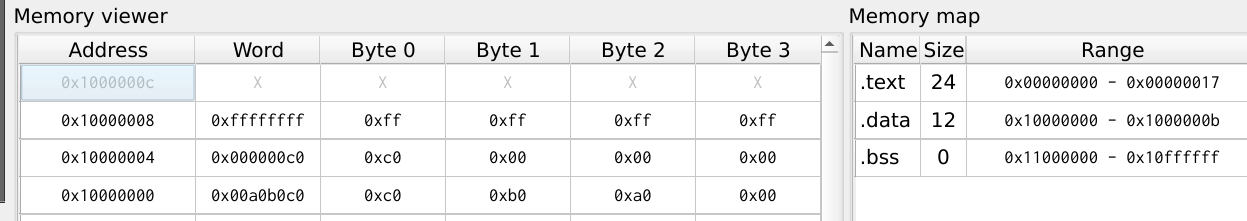@solution@

PREGUNTA: A la vista del valor inicial de la variable `var1` (en el código ensamblador) y el valor de los bytes en que se almacena en memoria, ¿qué esquema de almacenamiento (endianness u orden de bytes) se utiliza en RISC-V? 

RESPUESTA:

var1 tiene el valor inicial 0xa0b0c0 y el byte en la posición 0x10000000 vale c0, por lo que es una arquitectura little-endian, ya que el byte menos significativo se guarda en primer lugar. @solution@

PREGUNTA: ¿Cuál es el valor inicial, en decimal, de la variable `result` (en el código ensamblador)? ¿En qué direcciones de memoria se almacena? ¿Cuál es el valor hexadecimal de cada uno  de los 4 bytes en que se almacena en memoria?

RESPUESTA:

`result` tiene el valor inicial -1. Se almacena en las posición 0x10000008 a la 0x1000000b. Los 4 bytes valen FF, ya que la codificación del -1 en complemento a 2 de 32 bits es 0xffffffff. @solution@

PREGUNTA: Continúa ejecutando el programa hasta el final. ¿Cuál es el valor final de la variable `result` en memoria? ¿De dónde procede el valor almacenado en dichas posiciones de memoria? Pega una captura de pantalla de la pestaña "Memory" que lo muestre. 

RESPUESTA:

El valor final de la variable `result` es 0xa0b000. Procede del registro x7, que es en el que guardó el resultado de restar las variables var1 y var2.@solution@
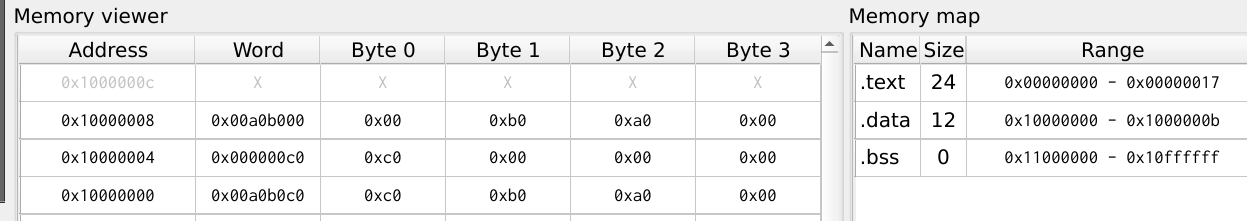 @solution@

### Ubicación de los datos del programa en memoria

- Entra en la configuración de Ripes (*Settings*) y asegúrate de establecer los argumentos del compilador y enlazador como se muestra en la siguiente imagen. Debes pasar **-O1** al compilador para que optimice el código y **-nostdlib** al enlazador para evitar enlazar con la biblioteca estándar. 

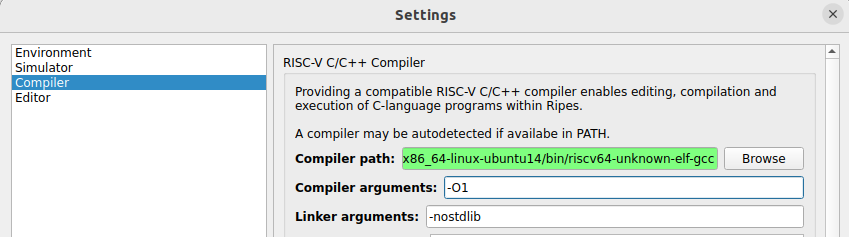

- A continuación, copia el siguiente código en el editor y compila a ensamblador.

```C
#define ARRAY_SIZE 16

int array[ARRAY_SIZE] = {15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0};

int main() {
    int i = 0;
    while(i < ARRAY_SIZE) {
        array[i] = -1;
        ++i;
    }
}
```

PREGUNTA: Explica brevemente lo que hace el programa.

RESPUESTA:

Se trata de un programa en C, que recorre un array de 16 enteros, cuyos valores iniciales van desde el 15 hasta el 0, y establece el valor de todos los elementos a -1. @solution@

- Haz una captura de pantalla de la memoria ocupada por el array. Para ello, debes ir a la vista *Memory* y luego seleccionar *Go to section->.data*.

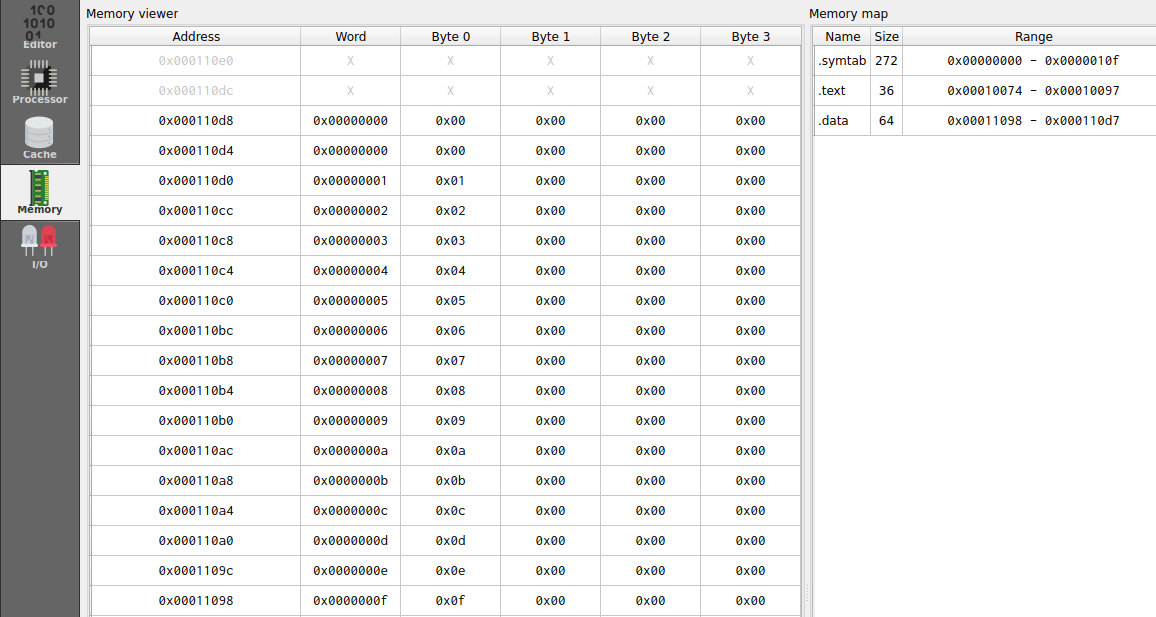@solution@

PREGUNTA: ¿Cuántos bytes ocupa el array en memoria? ¿Entre qué dos direcciones de memoria se encuentra almacenado el array? 

RESPUESTA:

Ocupa 64 bytes (tiene 16 elementos enteros, y cada uno ocupa 4 bytes). Empieza en la 0x11098 y acaba en la 0x110d7, ambas inclusive. @solution@

PREGUNTA: ¿Entre qué dos direcciones de memoria se almacena el primer elemento del array? Indica los valores en hexadecimal de cada byte que ocupa.

RESPUESTA:

Cada elemento ocupa 4 bytes, el primero empieza en la 0x11098 y acaba en la 0x1109b, ambas inclusive. Se codifica en 0f 00 00 00. @solution@

PREGUNTA: A la vista del valor inicial del primer elemento en el código C, ¿qué orden de bytes usa RISC-V?

RESPUESTA:

El valor del primer elemento del array es 15, por lo que vemos que se usa little endian: 0f 00 00 00  codifica el valor 15 como un entero con signo de 4 bytes (representado en complemento a 2). @solution@

PREGUNTA: Ejecuta paso a paso el programa hasta completar la primera iteración del bucle. ¿Qué registro se utiliza para guardar el valor entero -1? ¿Cuál es la codificación del -1 como entero con signo de 4 bytes?

RESPUESTA:

El registro x14. Se codifica como 0xffffffff. @solution@

PREGUNTA: ¿Qué instrucción es la que escribe en el array el valor -1?  ¿En qué dirección de memoria está ubicada dicha instrucción?

RESPUESTA:

La instrucción sw x14 0 x15. Está ubicada en la dirección 0x10084.@solution@

PREGUNTA: Continúa ejecutando iteraciones del bucle. ¿Qué valores va tomando el registro x15? ¿Para qué se utiliza dicho registro?

RESPUESTA:

Va tomando los valores 0x11098, 0x11098+4=0x1109c, 0x11098+8=0x110a0, 0x11098+12=0x110a4... que corresponde a la dirección de cada uno de los elementos del array. Se utiliza para acceder a memoria a escribir en dicha dirección el valor del registro x14 (-1). @solution@

### Un error de programación habitual

- Copia y pega el siguiente programa en C en el editor. Luego, elimina la opción **-O1** de los argumentos del compilador. Finalmente, ejecuta el programa paso a paso durante algunas iteraciones del bucle, y luego cambia a la pestaña *Memory* para observar la sección *.data* mientras observas los valores del array. 

```C
#define ARRAY_SIZE 16

int array[ARRAY_SIZE] = {15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0};

int main() {
    int i = 0;
    while(i < ARRAY_SIZE) {
        array[i] = -1;
    }
}
```

PREGUNTA: ¿Qué le ocurre al programa? Sabiendo que el programador quería establecer a -1 todos los elementos del array, ¿dónde está el error?

RESPUESTA:

El programa ha entrado en un bucle infinito y escribe continuamente el valor del primer elemento del array (array[0]). Para resolverlo, tiene que incrementar la variable i para pasar al siguiente elemento, añadiendo ++i; antes de acabar el bucle while. @solution@

- El siguiente programa en ensamblador es similar al programa en C anterior (escribe el valor -1 en todos los elementos de un array). Copia y pega en Ripes, y simula paso a paso observando lo que le ocurre al programa.

```
        .data
array:
        .word   15
        .word   14
        .word   13
        .word   12
        
    .text
main:
        la      a5, array
        addi    a3,a5,16
        li      a4, 0
loop:
        sw      a4,0(a5)
        addi    a4,a4,1
        bne     a5,a3,loop
        li      a0,0
        ret

```

PREGUNTA: ¿Qué le ocurre al programa? ¿Podrías identificar el *bug* y resolverlo?

RESPUESTA:

El programa ha entrado en un bucle infinito y escribe continuamente el valor -1 en la misma dirección de memoria (la del primer elemento del array). Para resolverlo, tiene que modificar el registro que contiene la dirección del array a escribir (a5), de forma que en cada iteración contenga la dirección del siguiente elemento. Como cada elemento ocupa 4 bytes (es un array de `int`), debe sumar 4 al registro antes del salto que cierra el bucle: `addi a5,a5,4`  @solution@

### Otro tipo de *bugs* bastante común

- Esta es otra versión diferente del programa que contiene un error distinto. Copia y pega el siguiente código en Ripes, y ejecuta tanto desde el editor como desde la pestaña *Memory*, observando lo que ocurre con los valores del array y de la variable "hola".

```
        .data
array:
        .word   15
        .word   14
        .word   13
        .word   12
hola:   .string "En un lugar de la Mancha, de cuyo nombre no quiero acordarme,..."
        
    .text
main:
        la      a5, array
        addi    a3,a5,-16
        li      a4, -1
loop:
        sw      a4,0(a5)
        addi    a4,a4,1
        addi    a5,a5,4
        bne     a5,a3,loop
        li      a0,0
        ret
```

PREGUNTA: ¿Qué le ocurre a este programa? ¿Cómo podrías solucionarlo? *PISTA: Fíjate en cómo se usa el registro a3 en el programa del ejercicio anterior.*)

RESPUESTA:

Se trata de un *buffer overflow* (desbordamiento de búfer). El programa no sólo escribe -1 en los 4 elementos del array sino que sigue escribiendo en las siguientes direcciones de memoria, en este caso ocupadas por la variable "hola", con lo que su valor se pierde. El error está en que el registro a3 no se ha establecido correctamente, ya que debería contener la dirección en la que acaba el array (dirección de "array" + 16 = 0x10000010) pero sin embargo tiene la dirección de "array"-16 = 0x0ffffff0. Por culpa de este error, los valores de a5 y a3 siempre son distintos, por lo que el bucle no termina donde debe y "machaca" la variable "hola" y lo que haya tras ello. 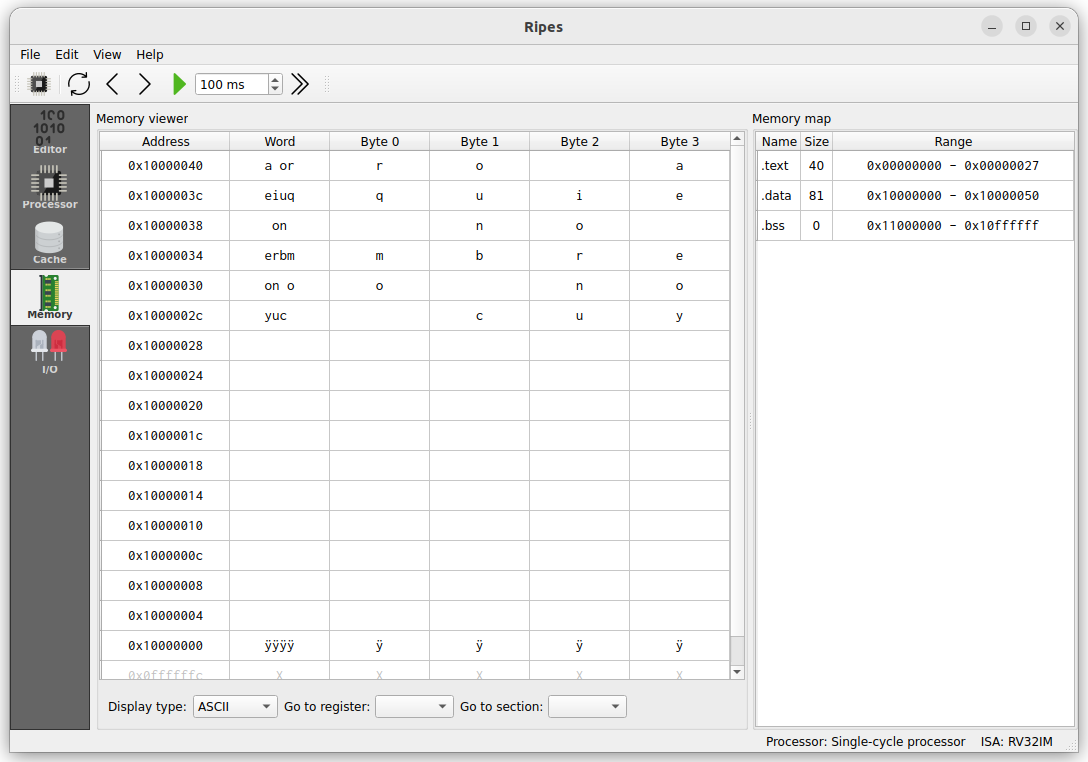@solution@